#load and train MLP on hog feature for train and test

Mounted at /content/drive


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
247/247 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.6161 - loss: 1.2006 - val_accuracy: 0.7616 - val_loss: 0.5308
Epoch 2/20
247/247 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7586 - loss: 0.5836 - val_accuracy: 0.7869 - val_loss: 0.4961
Epoch 3/20
247/247 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7982 - loss: 0.4905 - val_accuracy: 0.8058 - val_loss: 0.4412
Epoch 4/20
247/247 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8203 - loss: 0.4384 - val_accuracy: 0.8129 - val_loss: 0.4440
Epoch 5/20
247/247 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.8423 - loss: 0.3931 - val_accuracy: 0.8172 - val_loss: 0.4374
Epoch 6/20
247/247 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8591 - loss: 0.3521 - val_accuracy: 0.8175 - val_loss: 0.4575
Epoch 7/20
247/247 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8685 - loss: 0.3257 - val_accuracy: 0.8135 - val_loss: 0.4777
Epoch 8/20
247/247 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8855 - loss: 0.2854 - val_accuracy: 

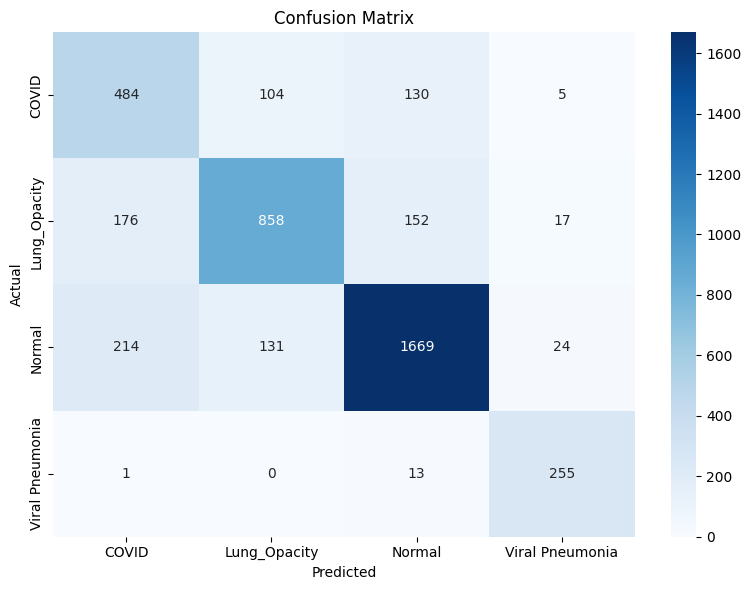

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

# === Load Data ===
base_dir = "/content/drive/MyDrive/train features"
test_dir = f"{base_dir}/test features"

X_train = np.load(f"{base_dir}/hog_features.npy")
y_train = np.load(f"{base_dir}/labels_train.npy")
X_test = np.load(f"{test_dir}/hog_features_test.npy")
y_test = np.load(f"{test_dir}/labels_test.npy")

# === Preprocessing ===
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

num_classes = len(np.unique(y_train))
y_train_cat = to_categorical(y_train, num_classes)
y_test_cat = to_categorical(y_test, num_classes)

# === Build MLP Model ===
model = Sequential([
    Dense(512, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.3),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# === Train Model ===
history = model.fit(X_train_scaled, y_train_cat,
                    validation_split=0.1,
                    epochs=20,
                    batch_size=128,
                    verbose=1)

# === Evaluate ===
y_pred_probs = model.predict(X_test_scaled)
y_pred = np.argmax(y_pred_probs, axis=1)

print("\n Classification Report:")
print(classification_report(y_test, y_pred))

# === Confusion Matrix ===
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=['COVID', 'Lung_Opacity', 'Normal', 'Viral Pneumonia'],
            yticklabels=['COVID', 'Lung_Opacity', 'Normal', 'Viral Pneumonia'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()



# plot epoch accuracy and loss

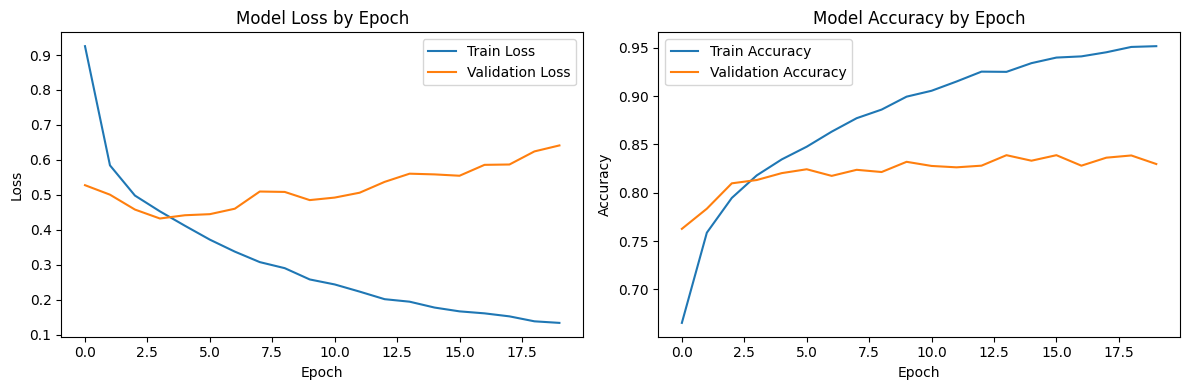

In [ ]:
# === Plot Model Loss and Accuracy by Epoch ===

plt.figure(figsize=(12, 4))

# Plot the loss
plt.subplot(121)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss by Epoch')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='best')

# Plot the accuracy
plt.subplot(122)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy by Epoch')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='best')

plt.tight_layout()
plt.show()


# save model

In [ ]:
# === Save Model ===
joblib.dump(pipeline, f"{base_dir}/mlp_classifier_pipeline.pkl")

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │     4,147,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │         1,028 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,840,206 (48.98 MB)

 Trainable params: 4,280,068 (16.33 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 8,560,138 (32.65 MB)

#  add layers to mlp

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
from tensorflow.keras.utils import to_categorical

# === Load data ===
base_dir = "/content/drive/MyDrive/train features"
test_dir = f"{base_dir}/test features"

X_train = np.load(f"{base_dir}/hog_features.npy")
y_train = np.load(f"{base_dir}/labels_train.npy")
X_test = np.load(f"{test_dir}/hog_features_test.npy")
y_test = np.load(f"{test_dir}/labels_test.npy")

# === Preprocess ===
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# One-hot encode labels
num_classes = len(np.unique(y_train))
y_train_cat = to_categorical(y_train, num_classes)
y_test_cat = to_categorical(y_test, num_classes)

# === MLP Model ===
model = Sequential([
    Dense(1024, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    BatchNormalization(),
    Dropout(0.4),

    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(256, activation='relu'),
    Dropout(0.2),

    Dense(num_classes, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# === Callbacks ===
callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3)
]

# === Train ===
history = model.fit(
    X_train_scaled, y_train_cat,
    validation_split=0.2,
    epochs=50,
    batch_size=128,
    callbacks=callbacks,
    verbose=1
)

# === Evaluate ===
y_pred_probs = model.predict(X_test_scaled)
y_pred = np.argmax(y_pred_probs, axis=1)

print(f"\n✅ Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# plot epoch loss and accuracy

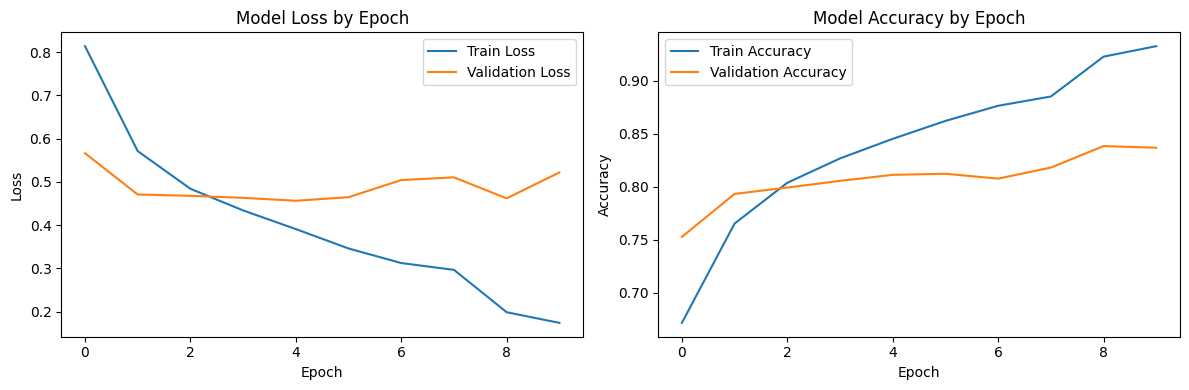

In [ ]:
# === Plot Model Loss and Accuracy by Epoch ===

plt.figure(figsize=(12, 4))

# Plot the loss
plt.subplot(121)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss by Epoch')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='best')

# Plot the accuracy
plt.subplot(122)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy by Epoch')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='best')

plt.tight_layout()
plt.show()


In [ ]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 1024)           │     8,295,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 1024)           │         4,096 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 4)              │         1,028 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 26,870,030 (102.50 MB)

 Trainable params: 8,955,652 (34.16 MB)

 Non-trainable params: 3,072 (12.00 KB)

 Optimizer params: 17,911,306 (68.33 MB)

# mlp fine tuned

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, accuracy_score
import joblib
import os

# === Load Data ===
base_dir = "/content/drive/MyDrive/train features"
X_train = np.load(f"{base_dir}/hog_features.npy")
y_train = np.load(f"{base_dir}/labels_train.npy")
X_test = np.load(f"{base_dir}/test features/hog_features_test.npy")
y_test = np.load(f"{base_dir}/test features/labels_test.npy")

# === Normalize ===
X_train = X_train / np.max(X_train)
X_test = X_test / np.max(X_test)

# === Convert labels to one-hot ===
y_train_cat = to_categorical(y_train, num_classes=4)
y_test_cat = to_categorical(y_test, num_classes=4)

# === Define Class Weights (boost class 0) ===
from sklearn.utils.class_weight import compute_class_weight

class_weights = compute_class_weight(class_weight='balanced',
                                     classes=np.unique(y_train),
                                     y=y_train)
class_weight_dict = dict(enumerate(class_weights))

# === Build Model ===
model = Sequential([
    Dense(512, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(4, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# === Train ===
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = model.fit(X_train, y_train_cat,
                    validation_split=0.1,
                    epochs=50,
                    batch_size=64,
                    class_weight=class_weight_dict,
                    callbacks=[early_stop],
                    verbose=2)

# === Evaluate ===
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

acc = accuracy_score(y_test, y_pred_classes)
print(f" Accuracy: {acc:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_classes))

# === Save Model ===
model.save(f"{base_dir}/mlp_tuned_covid_boosted.h5")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
494/494 - 9s - 18ms/step - accuracy: 0.6540 - loss: 0.7653 - val_accuracy: 0.7413 - val_loss: 0.5509
Epoch 2/50
494/494 - 2s - 5ms/step - accuracy: 0.7351 - loss: 0.6108 - val_accuracy: 0.7664 - val_loss: 0.5215
Epoch 3/50
494/494 - 3s - 6ms/step - accuracy: 0.7695 - loss: 0.5461 - val_accuracy: 0.8058 - val_loss: 0.4469
Epoch 4/50
494/494 - 2s - 5ms/step - accuracy: 0.7939 - loss: 0.5016 - val_accuracy: 0.7963 - val_loss: 0.4525
Epoch 5/50
494/494 - 2s - 5ms/step - accuracy: 0.8072 - loss: 0.4681 - val_accuracy: 0.7995 - val_loss: 0.4682
Epoch 6/50
494/494 - 2s - 4ms/step - accuracy: 0.8218 - loss: 0.4390 - val_accuracy: 0.8214 - val_loss: 0.4221
Epoch 7/50
494/494 - 3s - 5ms/step - accuracy: 0.8335 - loss: 0.4085 - val_accuracy: 0.8309 - val_loss: 0.4065
Epoch 8/50
494/494 - 2s - 5ms/step - accuracy: 0.8443 - loss: 0.3838 - val_accuracy: 0.8149 - val_loss: 0.4505
Epoch 9/50
494/494 - 3s - 5ms/step - accuracy: 0.8544 - loss: 0.3590 - val_accuracy: 0.8232 - val_loss: 0.4675


✅ Accuracy: 0.7725

Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.63      0.60       723
           1       0.75      0.74      0.75      1203
           2       0.86      0.82      0.84      2038
           3       0.86      0.96      0.90       269

    accuracy                           0.77      4233
   macro avg       0.76      0.79      0.77      4233
weighted avg       0.78      0.77      0.77      4233



#plot confusion matrix

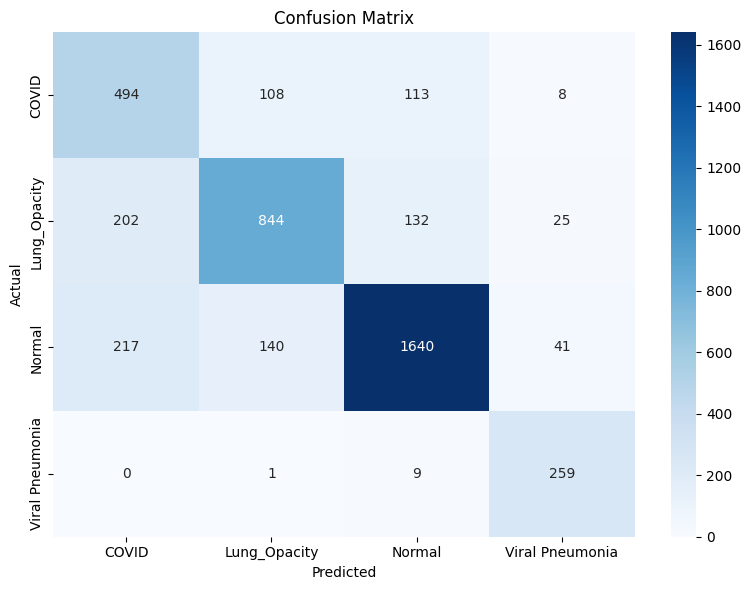

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=['COVID', 'Lung_Opacity', 'Normal', 'Viral Pneumonia'],
            yticklabels=['COVID', 'Lung_Opacity', 'Normal', 'Viral Pneumonia'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()


In [ ]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 512)            │     4,147,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,937,358 (49.35 MB)

 Trainable params: 4,312,452 (16.45 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 8,624,906 (32.90 MB)

further fine tuning of mlp

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Epoch 1/20
548/548 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.6082 - loss: 1.0673 - val_accuracy: 0.7193 - val_loss: 0.7227
Epoch 2/20
548/548 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7284 - loss: 0.6497 - val_accuracy: 0.7515 - val_loss: 0.6425
Epoch 3/20
548/548 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7616 - loss: 0.5648 - val_accuracy: 0.7569 - val_loss: 0.6334
Epoch 4/20
548/548 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.7925 - loss: 0.5069 - val_accuracy: 0.7723 - val_loss: 0.5923
Epoch 5/20
548/548 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8069 - loss: 0.4616 - val_accuracy: 0.7619 - val_loss: 0.6124
Epoch 6/20
548/548 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8189 - loss: 0.4406 - val_accuracy: 0.7687 - val_loss: 0.6086
Epoch 7/20
548/548 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8306 - loss: 0.4100 - val_accuracy: 0.7704 - val_loss: 0.6009
Epoch 8/20
548/548 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8401 - loss: 0.3872 - val_accuracy: 0

✅ Accuracy: 0.7593

Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.67      0.60       723
           1       0.74      0.75      0.75      1203
           2       0.87      0.77      0.82      2038
           3       0.82      0.95      0.88       269

    accuracy                           0.76      4233
   macro avg       0.74      0.79      0.76      4233
weighted avg       0.77      0.76      0.76      4233



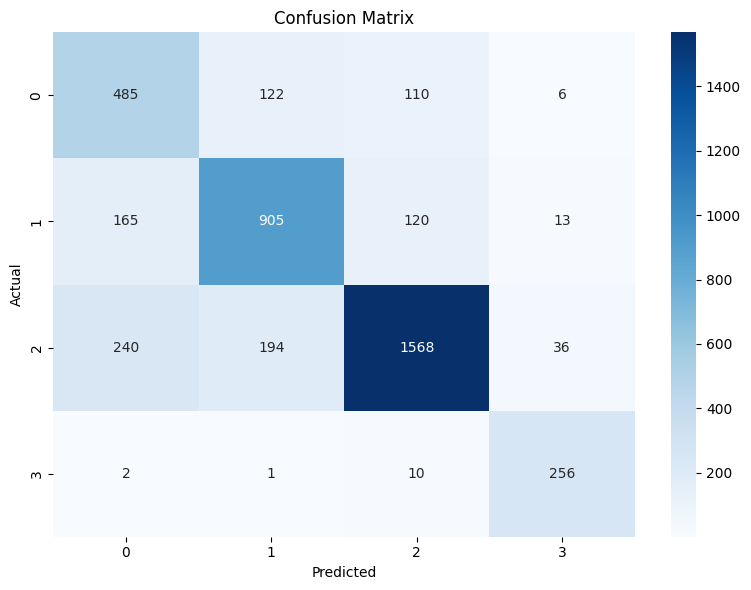

In [ ]:
import numpy as np
import joblib
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils import class_weight
from keras.models import Sequential
from keras.layers import Dense, Dropout, LeakyReLU, BatchNormalization
from keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler

# === Load data ===
base_dir = "/content/drive/MyDrive/train features"
test_dir = f"{base_dir}/test features"

X_train = np.load(f"{base_dir}/hog_features.npy")
y_train = np.load(f"{base_dir}/labels_train.npy")
X_test = np.load(f"{test_dir}/hog_features_test.npy")
y_test = np.load(f"{test_dir}/labels_test.npy")

# === Scale data ===
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# === Class weights for imbalanced classes ===
class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)
class_weights = dict(enumerate(class_weights))

# === Define the MLP model ===
model = Sequential()

# Input layer and first hidden layer with LeakyReLU activation and Dropout
model.add(Dense(512, input_dim=X_train.shape[1]))
model.add(LeakyReLU(alpha=0.1))  # Leaky ReLU activation
model.add(Dropout(0.5))  # Dropout to prevent overfitting

# Second hidden layer
model.add(Dense(256))
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(0.3))

# Third hidden layer
model.add(Dense(128))
model.add(LeakyReLU(alpha=0.1))

# Output layer
model.add(Dense(4, activation='softmax'))  # 4 classes

# === Compile the model ===
optimizer = Adam(learning_rate=0.0005)  # Lower learning rate
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# === Train the model ===
model.fit(X_train, y_train, epochs=20, batch_size=64, class_weight=class_weights, validation_data=(X_test, y_test))

# === Evaluate the model ===
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert predictions to class labels

# Calculate accuracy and print the classification report
acc = accuracy_score(y_test, y_pred_classes)
print(f"✅ Accuracy: {acc:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_classes))

# === Save the model ===
model.save(f"{base_dir}/mlp_model_improved.h5")

# === Confusion Matrix ===
conf_matrix = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()


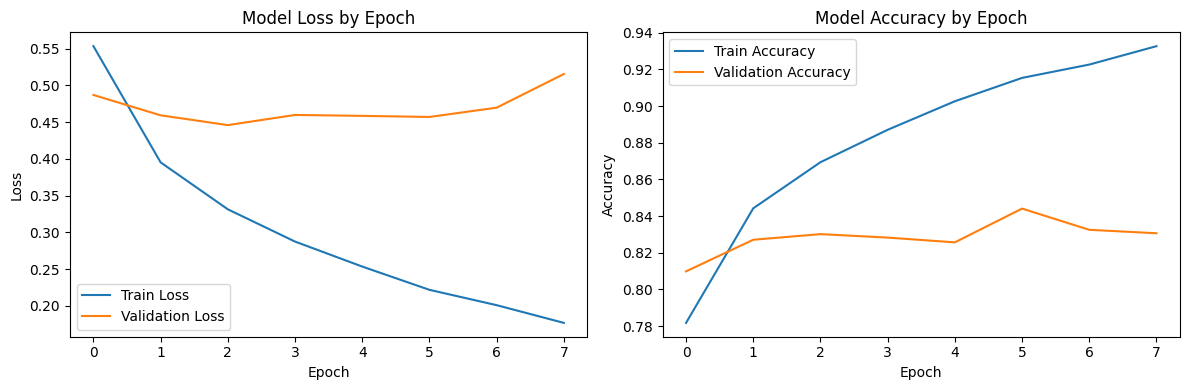

In [ ]:
# === Plot Model Loss and Accuracy by Epoch ===

plt.figure(figsize=(12, 4))

# Plot the loss
plt.subplot(121)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss by Epoch')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='best')

# Plot the accuracy
plt.subplot(122)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy by Epoch')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='best')

plt.tight_layout()
plt.show()


In [ ]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                │ (None, 512)            │     4,147,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,937,358 (49.35 MB)

 Trainable params: 4,312,452 (16.45 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 8,624,906 (32.90 MB)

In [ ]:
# Save the model in Keras format
model.save(f"{base_dir}/mlp_model_improved.keras")


# MLP architecture tuning

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Epoch 1/50
1096/1096 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.5294 - loss: 1.1900 - val_accuracy: 0.6981 - val_loss: 0.7540
Epoch 2/50
1096/1096 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.6738 - loss: 0.7884 - val_accuracy: 0.7274 - val_loss: 0.7044
Epoch 3/50
1096/1096 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7168 - loss: 0.6823 - val_accuracy: 0.7545 - val_loss: 0.6487
Epoch 4/50
1096/1096 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7443 - loss: 0.6170 - val_accuracy: 0.7609 - val_loss: 0.6320
Epoch 5/50
1096/1096 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.7633 - loss: 0.5680 - val_accuracy: 0.7661 - val_loss: 0.6109
Epoch 6/50
1096/1096 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.7757 - loss: 0.5410 - val_accuracy: 0.7685 - val_loss: 0.6054
Epoch 7/50
1096/1096 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7937 - loss: 0.5031 - val_accuracy: 0.7645 - val_loss: 0.6088
Epoch 8/50
1096/1096 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8014 - loss: 0.486

✅ Accuracy: 0.7782

Classification Report:
               precision    recall  f1-score   support

           0       0.59      0.59      0.59       723
           1       0.76      0.74      0.75      1203
           2       0.84      0.84      0.84      2038
           3       0.89      0.95      0.92       269

    accuracy                           0.78      4233
   macro avg       0.77      0.78      0.77      4233
weighted avg       0.78      0.78      0.78      4233



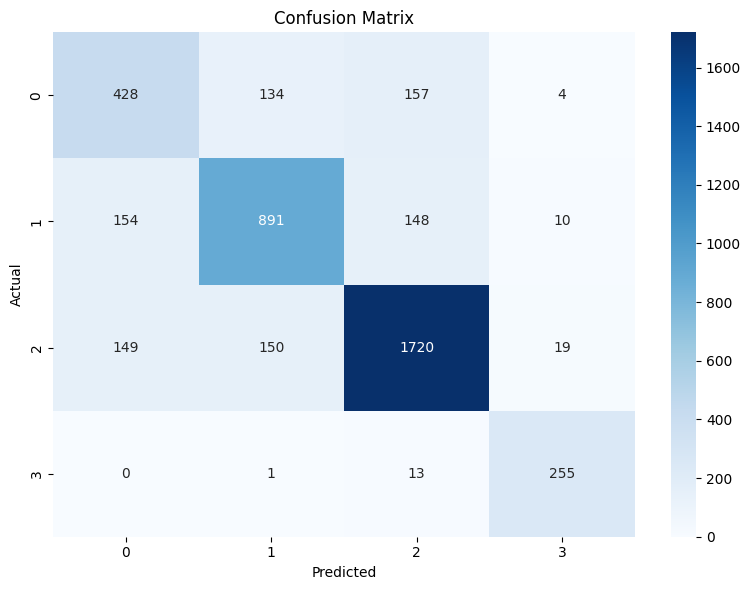

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import numpy as np
import joblib
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils import class_weight
from keras.models import Sequential
from keras.layers import Dense, Dropout, LeakyReLU, BatchNormalization
from keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from keras.callbacks import EarlyStopping

# === Load data ===
base_dir = "/content/drive/MyDrive/train features"
test_dir = f"{base_dir}/test features"

X_train = np.load(f"{base_dir}/hog_features.npy")
y_train = np.load(f"{base_dir}/labels_train.npy")
X_test = np.load(f"{test_dir}/hog_features_test.npy")
y_test = np.load(f"{test_dir}/labels_test.npy")

# === Scale data ===
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# === Class weights for imbalanced classes ===
class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)
class_weights = dict(enumerate(class_weights))

# === Define the MLP model with refined hyperparameters ===
model = Sequential()

# Input layer and first hidden layer with LeakyReLU activation and Dropout
model.add(Dense(1024, input_dim=X_train.shape[1]))  # Increased neurons in the first layer
model.add(LeakyReLU(alpha=0.2))  # Modified Leaky ReLU alpha
model.add(Dropout(0.6))  # Increased dropout to prevent overfitting

# Second hidden layer with more neurons and BatchNormalization
model.add(Dense(512))
model.add(LeakyReLU(alpha=0.2))  # Modified Leaky ReLU alpha
model.add(Dropout(0.5))  # Adjusted dropout rate
model.add(BatchNormalization())  # Added BatchNormalization

# Third hidden layer with further reduced neurons and BatchNormalization
model.add(Dense(256))
model.add(LeakyReLU(alpha=0.2))  # Modified Leaky ReLU alpha
model.add(Dropout(0.4))  # Adjusted dropout rate
model.add(BatchNormalization())  # Added BatchNormalization

# Output layer
model.add(Dense(4, activation='softmax'))  # 4 classes

# === Compile the model with a refined learning rate ===
optimizer = Adam(learning_rate=0.0001)  # Reduced learning rate to 0.0001
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# === Set up Early Stopping to prevent overfitting ===
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# === Train the model with more epochs and batch size adjustments ===
model.fit(X_train, y_train,
          epochs=50,  # Increased number of epochs
          batch_size=32,  # Smaller batch size
          class_weight=class_weights,
          validation_data=(X_test, y_test),
          callbacks=[early_stopping])

# === Evaluate the model ===
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert predictions to class labels

# Calculate accuracy and print the classification report
acc = accuracy_score(y_test, y_pred_classes)
print(f"✅ Accuracy: {acc:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_classes))

# === Save the model ===
model.save(f"{base_dir}/mlp_model_refined.h5")

# === Confusion Matrix ===
conf_matrix = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()


'#using smote for imbalance

In [ ]:
model.save(f"{base_dir}/mlp_model_improvedepochs.keras")

In [ ]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_18 (Dense)                │ (None, 1024)           │     8,295,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_3 (LeakyReLU)       │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_4 (LeakyReLU)       │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_5 (LeakyReLU)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 4)              │         1,028 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 26,863,886 (102.48 MB)

 Trainable params: 8,954,116 (34.16 MB)

 Non-trainable params: 1,536 (6.00 KB)

 Optimizer params: 17,908,234 (68.31 MB)

# MLP with smote

In [ ]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train)


In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler # Import StandardScaler
# Initialize the StandardScaler
scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
from tensorflow.keras.utils import to_categorical

In [ ]:
model.fit(X_train_resampled, y_train_resampled,
          epochs=50,
          batch_size=32,
          validation_data=(X_test, y_test),
          callbacks=[early_stopping])


Epoch 1/50
1203/1203 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.8064 - loss: 0.0427 - val_accuracy: 0.7647 - val_loss: 0.0643
Epoch 2/50
1203/1203 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.8191 - loss: 0.0392 - val_accuracy: 0.7808 - val_loss: 0.0614
Epoch 3/50
1203/1203 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8376 - loss: 0.0356 - val_accuracy: 0.7678 - val_loss: 0.0641
Epoch 4/50
1203/1203 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8473 - loss: 0.0328 - val_accuracy: 0.7484 - val_loss: 0.0683
Epoch 5/50
1203/1203 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.8525 - loss: 0.0304 - val_accuracy: 0.7831 - val_loss: 0.0651
Epoch 6/50
1203/1203 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8586 - loss: 0.0286 - val_accuracy: 0.7867 - val_loss: 0.0657
Epoch 7/50
1203/1203 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8651 - loss: 0.0267 - val_accuracy: 0.7928 - val_loss: 0.0675


In [ ]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import numpy as np

# Predict
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Metrics
acc = accuracy_score(y_test, y_pred_classes)
print(f"✅ Accuracy: {acc:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_classes))


133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
✅ Accuracy: 0.7808

Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.61      0.61       723
           1       0.74      0.75      0.75      1203
           2       0.85      0.84      0.84      2038
           3       0.88      0.94      0.91       269

    accuracy                           0.78      4233
   macro avg       0.77      0.78      0.78      4233
weighted avg       0.78      0.78      0.78      4233



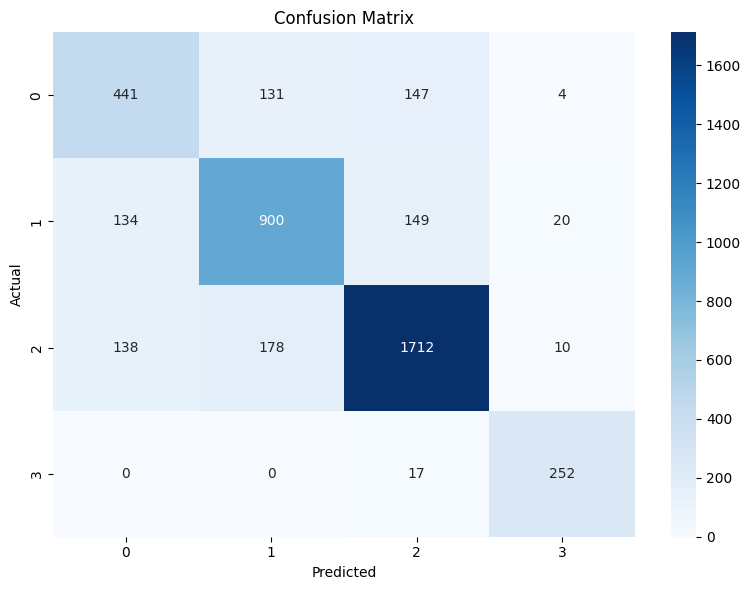

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1024)           │     8,295,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 1024)           │         4,096 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_3 (LeakyReLU)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 26,967,182 (102.87 MB)

 Trainable params: 8,988,036 (34.29 MB)

 Non-trainable params: 3,072 (12.00 KB)

 Optimizer params: 17,976,074 (68.57 MB)

# MLP with  focal loss

Mounted at /content/drive


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
1096/1096 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.5612 - loss: 0.1449 - val_accuracy: 0.7333 - val_loss: 0.0716
Epoch 2/50
1096/1096 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 0.6962 - loss: 0.0740 - val_accuracy: 0.7458 - val_loss: 0.0672
Epoch 3/50
1096/1096 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.7388 - loss: 0.0619 - val_accuracy: 0.7605 - val_loss: 0.0657
Epoch 4/50
1096/1096 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7630 - loss: 0.0555 - val_accuracy: 0.7600 - val_loss: 0.0638
Epoch 5/50
1096/1096 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7790 - loss: 0.0507 - val_accuracy: 0.7758 - val_loss: 0.0621
Epoch 6/50
1096/1096 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7912 - loss: 0.0464 - val_accuracy: 0.7704 - val_loss: 0.0611
Epoch 7/50
1096/1096 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8022 - loss: 0.0444 - val_accuracy: 0.7749 - val_loss: 0.0604
Epoch 8/50
1096/1096 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.8153 - loss: 0.040

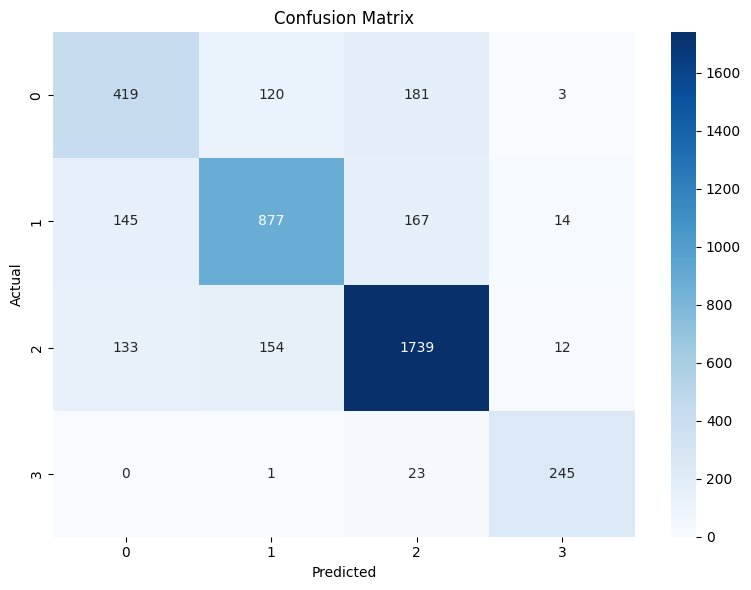

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import numpy as np
import joblib
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.utils import class_weight
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, LeakyReLU, BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
import tensorflow as tf

# === Load data ===
base_dir = "/content/drive/MyDrive/train features"
test_dir = f"{base_dir}/test features"

X_train = np.load(f"{base_dir}/hog_features.npy")
y_train = np.load(f"{base_dir}/labels_train.npy")
X_test = np.load(f"{test_dir}/hog_features_test.npy")
y_test = np.load(f"{test_dir}/labels_test.npy")

# === Preprocessing ===
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# === Focal Loss Definition ===
def focal_loss(gamma=2., alpha=0.25):
    def focal_loss_fixed(y_true, y_pred):
        y_true = tf.cast(y_true, tf.int32)
        y_true_one_hot = tf.one_hot(y_true, depth=4)
        epsilon = tf.keras.backend.epsilon()
        y_pred = tf.clip_by_value(y_pred, epsilon, 1. - epsilon)
        cross_entropy = -y_true_one_hot * tf.math.log(y_pred)
        weight = alpha * tf.pow(1 - y_pred, gamma)
        loss = weight * cross_entropy
        return tf.reduce_mean(tf.reduce_sum(loss, axis=1))
    return focal_loss_fixed

# === Build Model ===
model = Sequential()
model.add(Dense(1024, input_dim=X_train.shape[1]))
model.add(LeakyReLU(0.1))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(512))
model.add(LeakyReLU(0.1))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Dense(256))
model.add(LeakyReLU(0.1))
model.add(Dropout(0.3))

model.add(Dense(128))
model.add(LeakyReLU(0.1))

model.add(Dense(4, activation='softmax'))

optimizer = Adam(learning_rate=0.0003)
model.compile(optimizer=optimizer, loss=focal_loss(gamma=2.0, alpha=0.25), metrics=['accuracy'])

# === Early stopping ===
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# === Train model ===
model.fit(X_train, y_train,
          epochs=50,
          batch_size=32,
          validation_data=(X_test, y_test),
          callbacks=[early_stopping])

# === Evaluate ===
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

print(f"\n✅ Accuracy: {accuracy_score(y_test, y_pred_classes):.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_classes))

# === Confusion Matrix ===
conf_matrix = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

# === Save model ===
model.save(f"{base_dir}/mlp_model_focal_loss.h5")


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1024)           │     8,295,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 1024)           │         4,096 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_3 (LeakyReLU)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 26,967,182 (102.87 MB)

 Trainable params: 8,988,036 (34.29 MB)

 Non-trainable params: 3,072 (12.00 KB)

 Optimizer params: 17,976,074 (68.57 MB)

# MLP on restnet

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Epoch 1/50
548/548 ━━━━━━━━━━━━━━━━━━━━ 13s 14ms/step - accuracy: 0.7392 - loss: 0.6638 - val_accuracy: 0.8018 - val_loss: 0.4949
Epoch 2/50
548/548 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8423 - loss: 0.3987 - val_accuracy: 0.8235 - val_loss: 0.4652
Epoch 3/50
548/548 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8674 - loss: 0.3359 - val_accuracy: 0.8275 - val_loss: 0.4595
Epoch 4/50
548/548 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8909 - loss: 0.2874 - val_accuracy: 0.8290 - val_loss: 0.4514
Epoch 5/50
548/548 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9066 - loss: 0.2437 - val_accuracy: 0.8316 - val_loss: 0.4532
Epoch 6/50
548/548 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9155 - loss: 0.2159 - val_accuracy: 0.8254 - val_loss: 0.4728
Epoch 7/50
548/548 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9268 - loss: 0.1907 - val_accuracy: 0.8396 - val_loss: 0.4842
Epoch 8/50
548/548 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9338 - loss: 0.1788 - val_accuracy: 

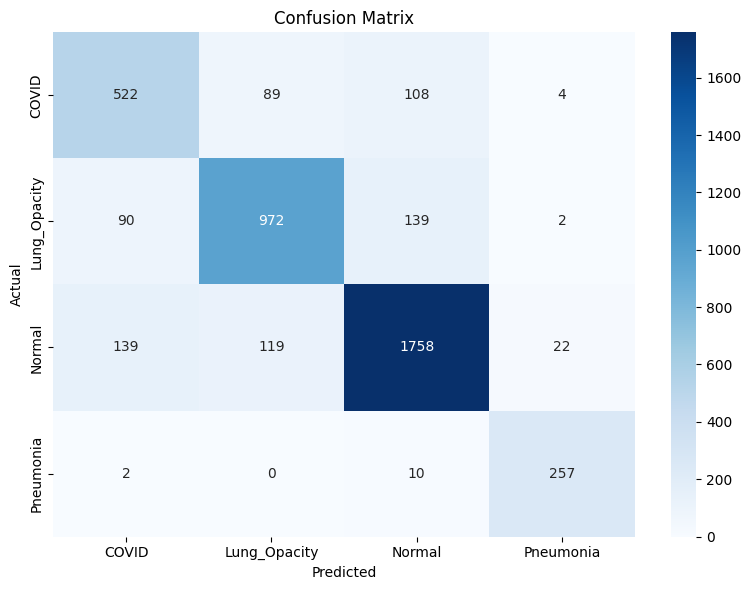

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import numpy as np
import joblib
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization, LeakyReLU
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

# === Load Data ===
base_dir = "/content/drive/MyDrive/train features"
test_dir = f"{base_dir}/test features"

X_train = np.load(f"{base_dir}/ResNet_HOG.npy")
y_train = np.load(f"{base_dir}/labels_train.npy")
X_test = np.load(f"{test_dir}/ResNet_HOG_test.npy")
y_test = np.load(f"{test_dir}/labels_test.npy")

# === Scale the Features ===
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# === Define MLP Model ===
model = Sequential([
    Dense(512, input_dim=X_train.shape[1]),
    LeakyReLU(alpha=0.1),
    BatchNormalization(),
    Dropout(0.4),

    Dense(256),
    LeakyReLU(alpha=0.1),
    BatchNormalization(),
    Dropout(0.3),

    Dense(128),
    LeakyReLU(alpha=0.1),

    Dense(4, activation='softmax')  # 4 classes
])

# === Compile Model ===
optimizer = Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# === Train Model ===
early_stopping = EarlyStopping(patience=5, restore_best_weights=True)

history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=50,
                    batch_size=64,
                    callbacks=[early_stopping],
                    verbose=1)

# === Evaluate ===
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

acc = accuracy_score(y_test, y_pred_classes)
print(f"✅ Accuracy: {acc:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_classes))

# === Confusion Matrix ===
conf_matrix = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=['COVID', 'Lung_Opacity', 'Normal', 'Pneumonia'],
            yticklabels=['COVID', 'Lung_Opacity', 'Normal', 'Pneumonia'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

# === Save Model ===
model.save(f"{base_dir}/mlp_resnet_model.keras")


dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


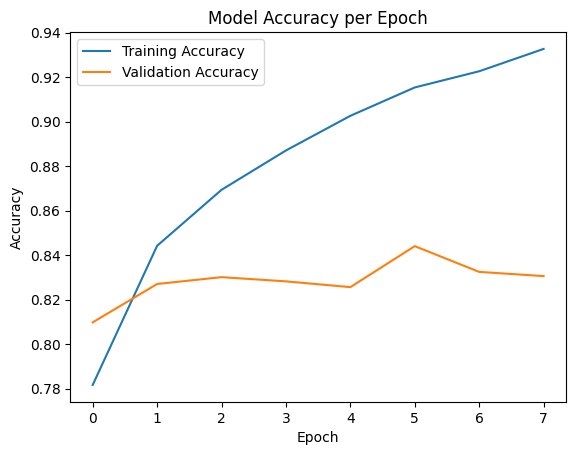

In [ ]:
# Check available metrics in history
print(history.history.keys())

# Example: Plot accuracy over epochs
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()



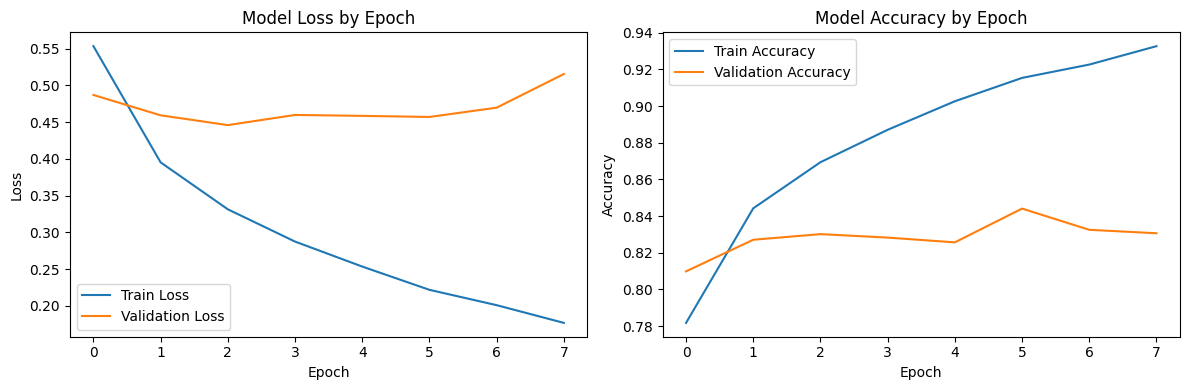

In [ ]:
# === Plot Model Loss and Accuracy by Epoch ===

plt.figure(figsize=(12, 4))

# Plot the loss
plt.subplot(121)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss by Epoch')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='best')

# Plot the accuracy
plt.subplot(122)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy by Epoch')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='best')

plt.tight_layout()
plt.show()

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 512)            │     5,196,288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_4 (LeakyReLU)       │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_5 (LeakyReLU)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_6 (LeakyReLU)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,089,230 (61.38 MB)

 Trainable params: 5,362,564 (20.46 MB)

 Non-trainable params: 1,536 (6.00 KB)

 Optimizer params: 10,725,130 (40.91 MB)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
247/247 ━━━━━━━━━━━━━━━━━━━━ 12s 26ms/step - accuracy: 0.5872 - loss: 2.5767 - val_accuracy: 0.7578 - val_loss: 1.6983
Epoch 2/50
247/247 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7396 - loss: 1.6805 - val_accuracy: 0.7804 - val_loss: 1.2792
Epoch 3/50
247/247 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7739 - loss: 1.2710 - val_accuracy: 0.7869 - val_loss: 1.0776
Epoch 4/50
247/247 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7879 - loss: 1.0900 - val_accuracy: 0.7932 - val_loss: 0.9511
Epoch 5/50
247/247 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7913 - loss: 0.9869 - val_accuracy: 0.7944 - val_loss: 0.9035
Epoch 6/50
247/247 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7937 - loss: 0.9183 - val_accuracy: 0.7983 - val_loss: 0.8515
Epoch 7/50
247/247 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7860 - loss: 0.9046 - val_accuracy: 0.8015 - val_loss: 0.8344
Epoch 8/50
247/247 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7893 - loss: 0.8785 - val_accuracy: 

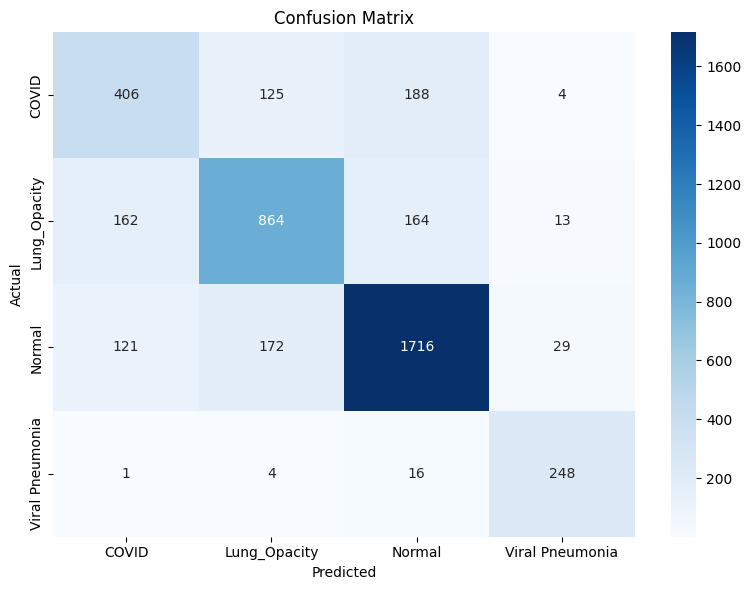

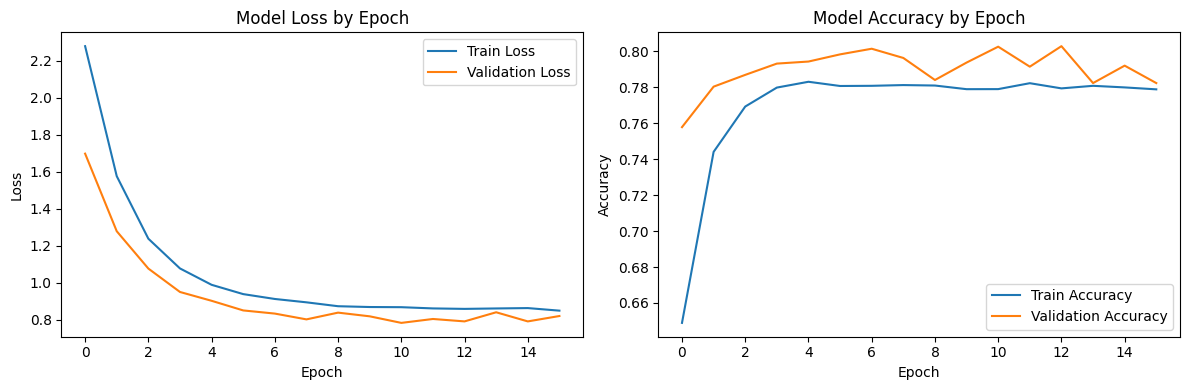

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping

# === Build Improved MLP Model ===
model = Sequential([
    Dense(512, activation='relu', kernel_regularizer=l2(0.001), input_shape=(X_train_scaled.shape[1],)),
    BatchNormalization(),
    Dropout(0.4),

    Dense(256, activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.4),

    Dense(128, activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.4),

    Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# === Early Stopping Callback ===
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1)

# === Train Model ===
history = model.fit(X_train_scaled, y_train_cat,
                    validation_split=0.1,
                    epochs=50,  # allow more epochs, early stopping will handle when to stop
                    batch_size=128,
                    callbacks=[early_stop],
                    verbose=1)

# === Evaluate Model ===
y_pred_probs = model.predict(X_test_scaled)
y_pred = np.argmax(y_pred_probs, axis=1)

print("\n✅ Classification Report:")
print(classification_report(y_test, y_pred))

# === Confusion Matrix ===
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=['COVID', 'Lung_Opacity', 'Normal', 'Viral Pneumonia'],
            yticklabels=['COVID', 'Lung_Opacity', 'Normal', 'Viral Pneumonia'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()

# === Plot Training History ===
plt.figure(figsize=(12,4))
plt.subplot(121)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss by Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(122)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy by Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 512)            │     4,147,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,944,526 (49.38 MB)

 Trainable params: 4,314,244 (16.46 MB)

 Non-trainable params: 1,792 (7.00 KB)

 Optimizer params: 8,628,490 (32.92 MB)